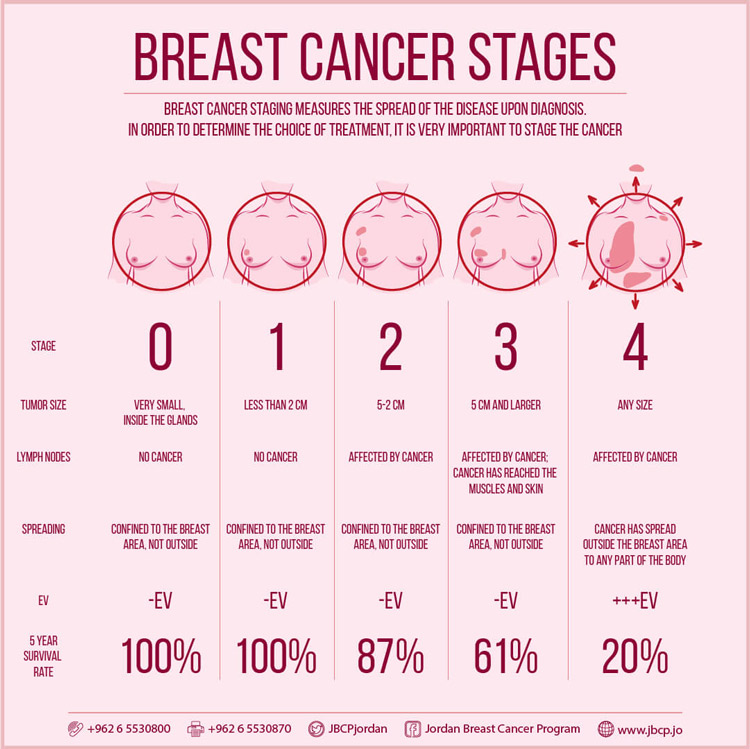

Background: The term "breast cancer" refers to a specific form of cancer that manifests itself first in the breast. It may originate in either one or both of the breasts. It is possible for breast cancer to spread when cancer cells enter the bloodstream or the lymph system and are then transferred to other areas of the body. This process is known as metastasis. The lymph system, also known as the lymphatic system, is a component of the immune system in your body. It is a system that consists of a network of lymph nodes, which are tiny glands about the size of beans, ducts or veins, and organs that work together to collect and transport lymph fluid that is clear to the blood from the tissues of the body. The lymph fluid, which is clear and found within the lymph veins, is full of immune system cells as well as the waste products and by-products of the tissues.

Breast cancer information may be found at the following website: [https://www.cancer.org/cancer/breast-cancer/about/what-is-breast-cancer] .html]

Motivation: Finding breast cancer at an early stage and undergoing cancer therapy that is up to date are two of the most essential and effective measures for reducing the number of fatalities caused by breast cancer. Breast cancer that is detected at an earlier stage, when it is still localized and has not spread, is more amenable to curative treatment. We will classify breast cancer using the KNN algorithm in this study that we are doing. Before beginning the KNN training, we will also do an analysis of the dataset's outliers. Techniques for dimension reduction, such as PCA and NCA, will be used in order to improve the accuracy of the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data.csv")
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
data = data.drop(['id','Unnamed: 32'], axis = 1)
data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
data.rename(columns = {'diagnosis':'target'}, inplace = True)
data.head(10)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


<AxesSubplot:xlabel='target', ylabel='count'>

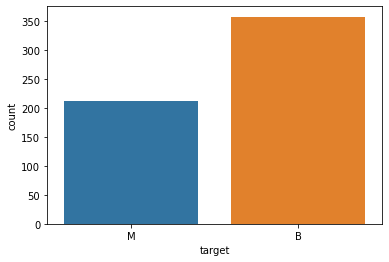

In [5]:
sns.countplot(data['target'])

In [6]:
print(data.target.value_counts())

B    357
M    212
Name: target, dtype: int64


In [7]:
data['target'] = [1 if i.strip() == 'M' else 0 for i in data['target']]

In [8]:
data.head(10)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [9]:
data.shape

(569, 31)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
data.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Basic EDA & Visualization

In [12]:
# Correlations
corr_matrix = data.corr()
corr_matrix

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


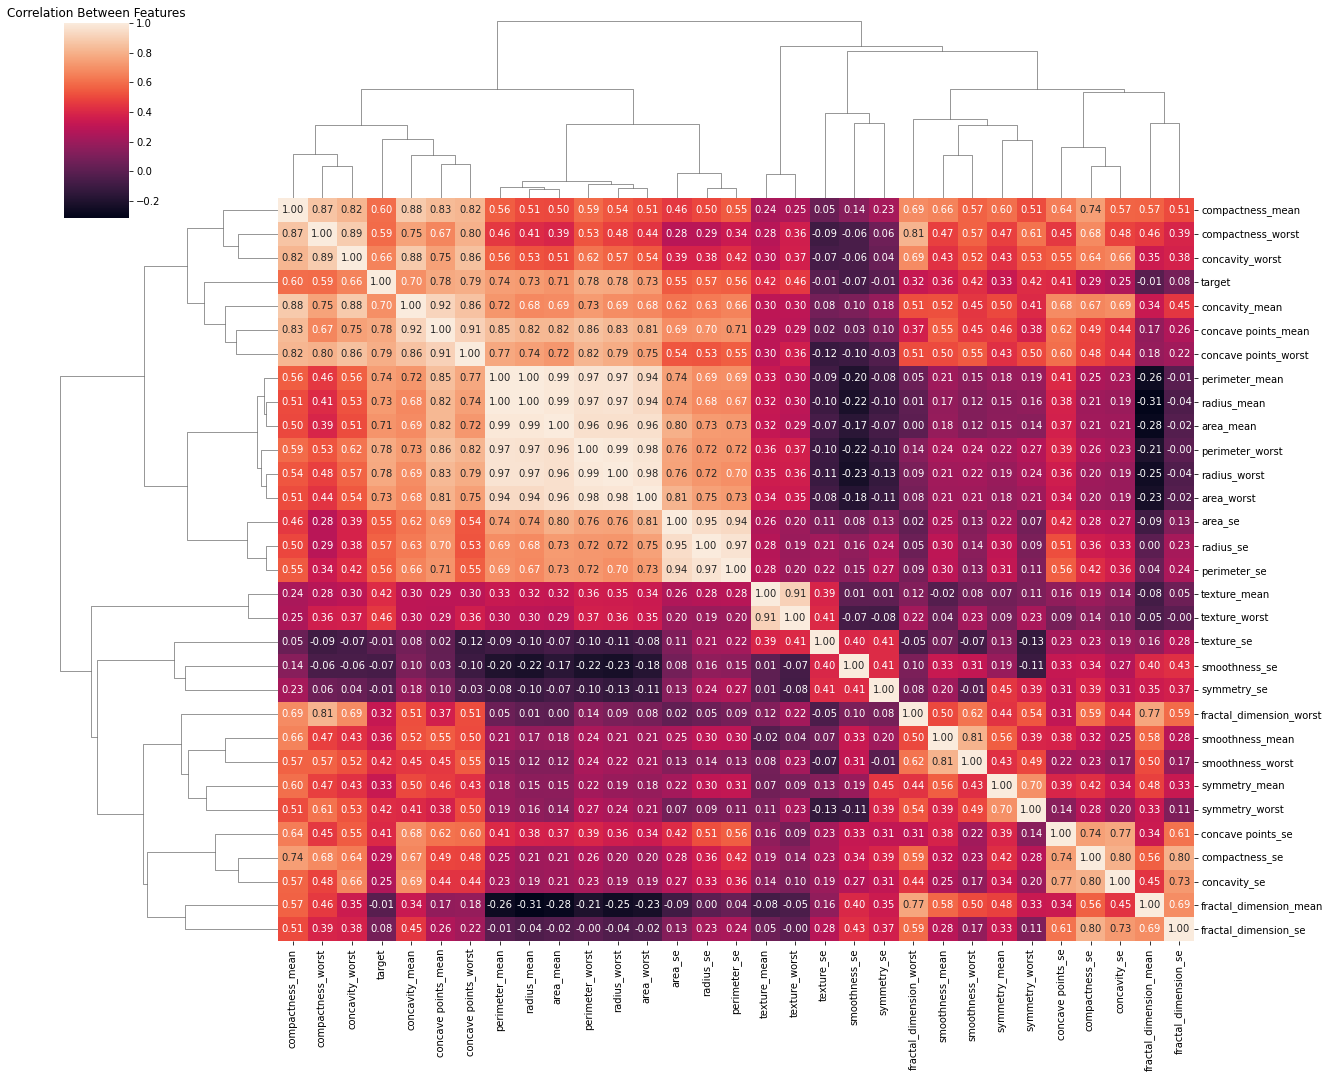

In [13]:
# Clustermap with Pearson Correlation Coefficients
sns.clustermap(corr_matrix, annot = True, fmt = ".2f", figsize = (18, 15))
plt.title("Correlation Between Features")
plt.show()

In [14]:
# threshold to explore highly correlated features
threshold = 0.75
filter_ = np.abs(corr_matrix['target']) > threshold
corr_features = corr_matrix.columns[filter_].tolist()
corr_features

['target',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'concave points_worst']

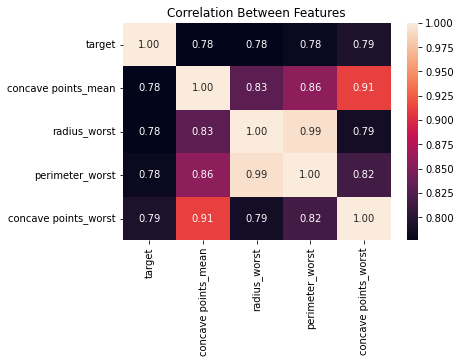

In [15]:
# visualize which features are highly correlated
sns.heatmap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

In [16]:
# melting data for box plot
data_melted = pd.melt(data, id_vars = 'target', var_name = 'feature', value_name = 'value')
data_melted

,target,feature,value
0,1,radius_mean,17.99000
1,1,radius_mean,20.57000
2,1,radius_mean,19.69000
3,1,radius_mean,11.42000
4,1,radius_mean,20.29000
...,...,...,...
17065,1,fractal_dimension_worst,0.07115
17066,1,fractal_dimension_worst,0.06637
17067,1,fractal_dimension_worst,0.07820
17068,1,fractal_dimension_worst,0.12400


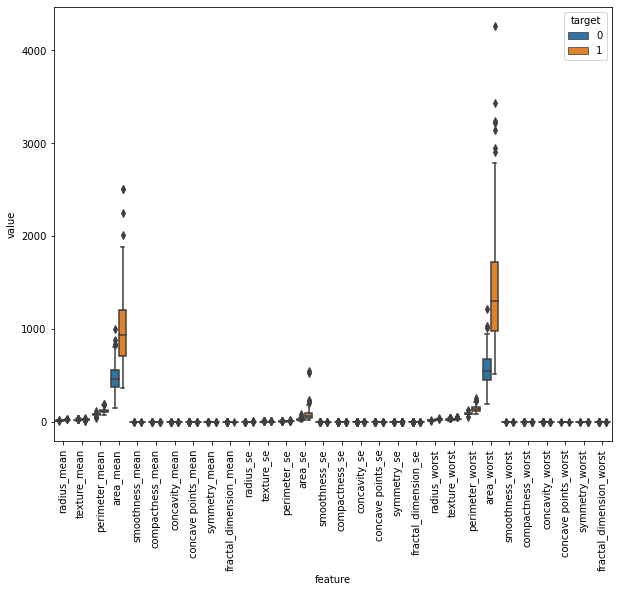

In [17]:
# Box plot to detect outliers
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'feature', y = 'value', hue = 'target', data = data_melted)
plt.xticks(rotation = 90)
plt.show()

As seen, box plots is a little bit confusing because non-scaled features. We have to normalize the features to solve this issue.

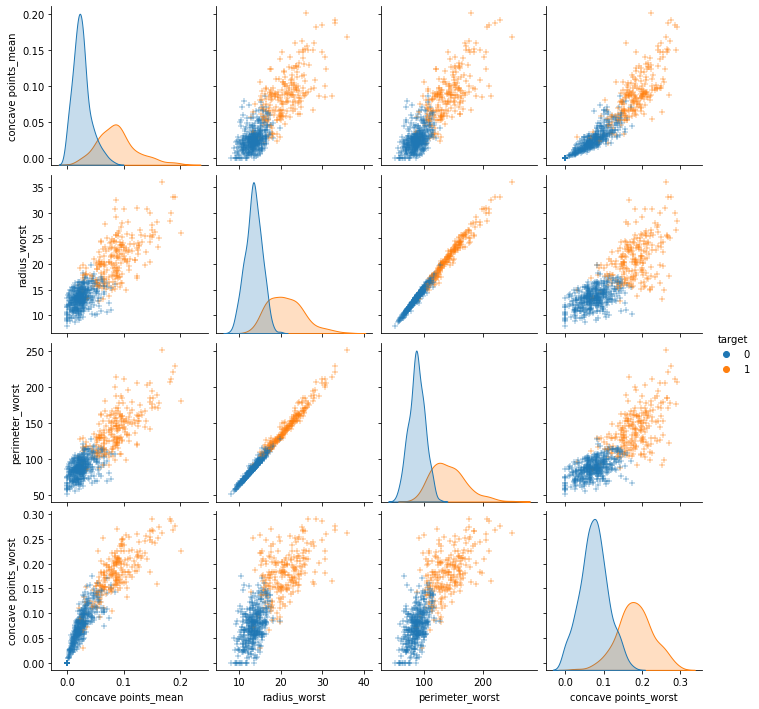

In [18]:
# decreasing threshold to see if the distributions have skewness
threshold = 0.75
filter_ = np.abs(corr_matrix['target']) > threshold
corr_features = corr_matrix.columns[filter_].tolist()
sns.pairplot(data[corr_features], diag_kind = 'kde', markers = "+", hue = 'target')
plt.show()

Skewness is a measurement of the distortion of symmetrical distribution or asymmetry in a data set. Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve.

A skewness value of 0 in the output denotes a symmetrical distribution of values in row 1.

A negative skewness value in the output indicates an asymmetry in the distribution corresponding to row 2 and the tail is larger towards the left hand side of the distribution.

A positive skewness value in the output indicates an asymmetry in the distribution corresponding to row 3 and the tail is larger towards the right hand side of the distribution.

In [19]:
skewness = pd.DataFrame(data.skew(), columns = ['skewness'])
skewness

,skewness
target,0.528461
radius_mean,0.942380
texture_mean,0.650450
perimeter_mean,0.990650
area_mean,1.645732
smoothness_mean,0.456324
compactness_mean,1.190123
concavity_mean,1.401180
concave points_mean,1.171180
symmetry_mean,0.725609


In [20]:
skewness['skewness'] = ["Positively skewed" if i >= 1 else "Negatively skewed" if i <= -1 else "Normal Distribution" for i in skewness['skewness']]
skewness

,skewness
target,Normal Distribution
radius_mean,Normal Distribution
texture_mean,Normal Distribution
perimeter_mean,Normal Distribution
area_mean,Positively skewed
smoothness_mean,Normal Distribution
compactness_mean,Positively skewed
concavity_mean,Positively skewed
concave points_mean,Positively skewed
symmetry_mean,Normal Distribution


Data Preprocessing & Outlier Analysis
Density based Outlier Detection: Local Outlier Factor (LOF) : Compare local density of one point to local density of its K-NN

LOF > 1 ==> outlier / anomaly

LOF < 1 ==> inlier

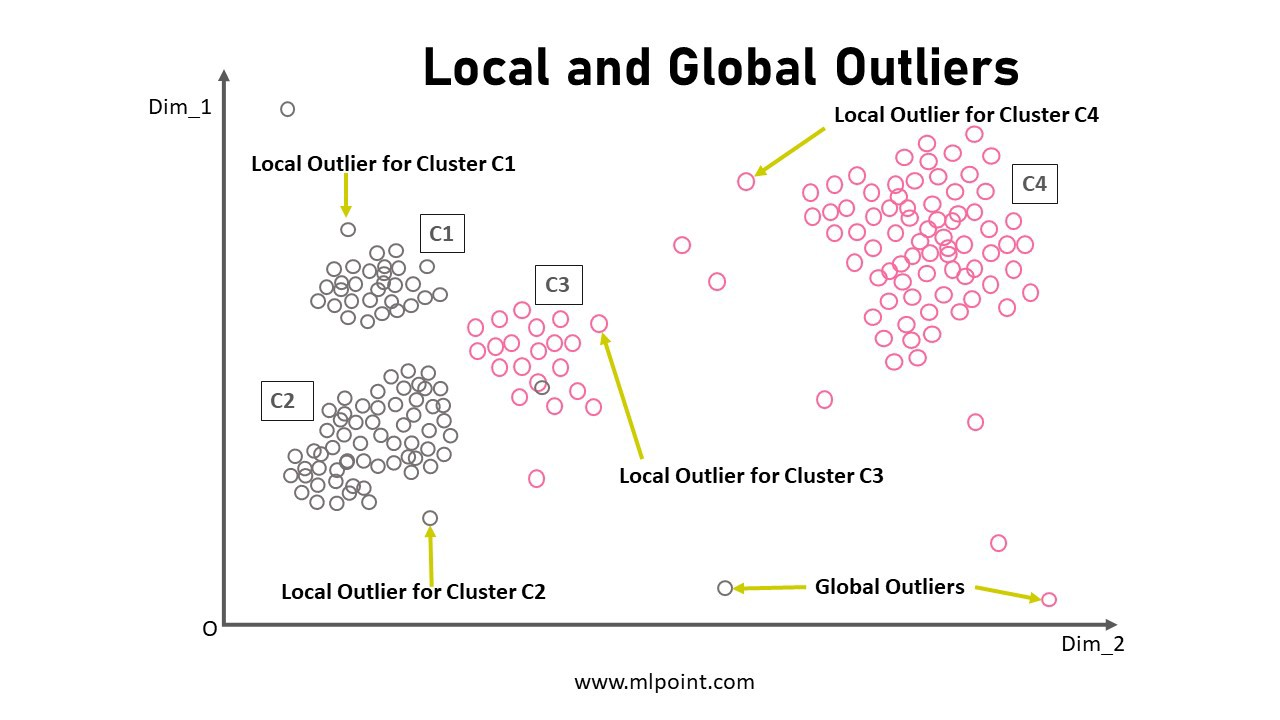

In [21]:
y = data.target
x = data.drop(["target"], axis = 1)
columns = x.columns.tolist()

In [22]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x) # Returns -1 for anomalies/outliers and +1 for inliers.
X_score = clf.negative_outlier_factor_
X_score

array([-1.42244008, -1.06678249, -0.97894764, -1.59693295, -1.06993589,
       -1.773071  , -1.01568723, -1.25174625, -1.38051485, -1.64435685,
       -0.99760184, -1.06178607, -1.12949091, -1.25844429, -0.96863713,
       -1.09335084, -1.13938097, -1.06049329, -1.41067136, -0.97224755,
       -0.98172267, -1.01796076, -1.00120872, -1.55647306, -1.76479918,
       -1.14444971, -1.18253923, -1.05669361, -1.1171278 , -0.96612603,
       -0.98190689, -1.99760079, -1.00701649, -1.00581116, -1.01466535,
       -0.98769018, -0.98362673, -1.39411328, -2.2334333 , -1.09045555,
       -1.14776543, -1.31502499, -0.98035055, -1.4174209 , -1.28342864,
       -0.98156833, -1.32235455, -1.32568003, -1.09322188, -0.97065701,
       -0.97278561, -1.05918996, -0.97370459, -1.02944   , -1.03748568,
       -1.00072293, -1.24017071, -1.05450437, -0.99159205, -1.09401411,
       -0.98594633, -1.09659782, -1.08187925, -1.00799336, -1.59848383,
       -1.05245105, -1.02666387, -0.97040029, -1.01252311, -1.06

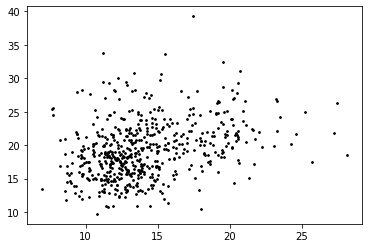

In [23]:
plt.figure()
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'k', s = 3, label = 'Data Point') # radius_mean and texture_mean as an example plot
plt.show()

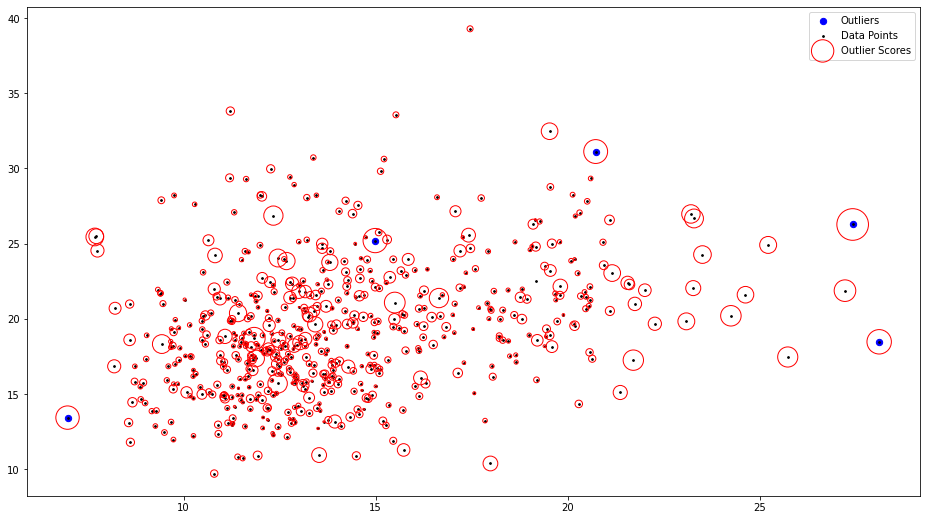

In [24]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

# threshold for negative lof values
threshold = -2
filter_ = outlier_score["score"] < threshold
outlier_index = outlier_score[filter_].index.tolist()

# Let's plot the outliers based on threshold we set
plt.figure(figsize = (16, 9))
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1], color = 'blue', s = 40, label = 'Outliers')
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'k', s = 3, label = 'Data Points')
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())  # Normalization
plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()


In [25]:
# Drop outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index)

In [26]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [27]:
# Standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
y_train = y_train.reset_index().drop("index", axis = 1)
x_train = pd.DataFrame(x_train, columns = columns)
train_df = pd.concat([x_train, y_train], axis = 1)
train_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,-0.341501,-0.763712,-0.333129,-0.402012,-0.656703,-0.189561,-0.507837,-0.463354,-0.106630,-0.094194,...,-0.611776,-0.299193,-0.418930,-0.059154,-0.020998,-0.326089,-0.216192,1.085642,-0.191899,0
1,-1.038477,-0.128318,-1.040263,-0.926658,0.741259,-0.727209,-0.832293,-0.799738,-1.186957,0.418254,...,-0.166392,-1.108509,-0.917309,0.368999,-0.998500,-0.930489,-0.767009,-1.147810,-0.349567,0
2,-0.948825,0.667695,-0.959412,-0.851161,-0.570159,-0.904779,-0.667753,-0.896436,0.762011,-0.456418,...,1.061690,-0.712278,-0.705442,-0.097307,-0.574743,-0.405048,-0.620257,0.109342,-0.452395,0
3,-1.276490,-0.156663,-1.265222,-1.059958,-0.468959,-0.806973,-0.750960,-0.868147,1.572256,0.155712,...,0.010452,-1.104832,-0.899111,-0.389808,-0.674833,-0.719916,-0.762102,0.458737,0.040033,0
4,-0.156413,-1.132193,-0.177292,-0.242466,0.112421,-0.451643,-0.286702,-0.027957,0.283893,-0.752655,...,-1.030961,-0.221663,-0.293779,0.483456,-0.524698,-0.180766,0.207042,0.129403,-0.682613,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.902065,1.267658,0.942895,0.828354,0.762197,1.479979,0.994630,0.785486,0.437183,0.259606,...,1.353155,1.368777,1.506994,1.098132,3.128584,1.842136,1.143983,0.691110,2.819795,1
390,2.368317,0.122060,2.559920,2.537655,2.541930,3.261378,4.207956,3.430785,2.732877,1.034596,...,0.401801,3.060344,2.767795,1.589872,2.870560,3.315716,2.694306,1.931545,0.762680,1
391,1.113182,1.258209,0.984787,1.033317,-0.532471,-0.660929,-0.407264,-0.037473,-0.982571,-1.112071,...,1.495612,0.863146,0.836671,-0.046437,-0.503250,-0.330933,-0.026044,-0.661332,-0.289014,1
392,-0.017596,-0.825126,-0.088062,-0.123912,-1.152934,-0.935545,-0.858529,-0.575482,-0.796433,-1.005369,...,-1.022774,-0.318805,-0.335186,-1.237636,-1.016048,-1.035267,-0.508162,-1.276535,-0.996236,0


In [29]:
# standardized train df
train_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
count,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,...,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,394.00000
mean,-6.148494e-16,7.583471e-16,5.252426e-16,2.076737e-16,-8.483062e-16,1.831586e-18,7.889910e-17,7.100919e-17,1.961206e-16,2.846003e-17,...,1.393414e-16,4.226737e-16,-1.301835e-16,-1.300426e-16,-4.423985e-17,6.142858e-17,-3.719529e-17,3.064032e-16,-1.335649e-16,0.36802
std,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,...,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,0.48288
min,-1.836963e+00,-2.230550e+00,-1.831181e+00,-1.385244e+00,-2.225659e+00,-1.550299e+00,-1.119268e+00,-1.257509e+00,-2.336629e+00,-1.833710e+00,...,-2.216469e+00,-1.524965e+00,-1.164641e+00,-2.603912e+00,-1.499664e+00,-1.338509e+00,-1.768048e+00,-1.985354e+00,-1.576067e+00,0.00000
25%,-6.878203e-01,-7.064321e-01,-6.859631e-01,-6.695699e-01,-7.203895e-01,-8.055489e-01,-7.617669e-01,-7.488177e-01,-7.033648e-01,-7.263306e-01,...,-7.096130e-01,-6.975689e-01,-6.600885e-01,-7.681511e-01,-7.169158e-01,-7.730797e-01,-7.682740e-01,-6.609143e-01,-6.877546e-01,0.00000
50%,-2.344969e-01,-8.462042e-02,-2.462037e-01,-3.130969e-01,-2.751526e-02,-2.382739e-01,-3.461710e-01,-3.890303e-01,-3.181028e-02,-1.664985e-01,...,-7.796968e-02,-2.850964e-01,-3.414068e-01,-5.915434e-02,-2.559498e-01,-2.185497e-01,-2.261594e-01,-1.355684e-01,-2.550236e-01,0.00000
75%,4.892299e-01,5.673075e-01,5.166462e-01,3.956467e-01,6.034173e-01,5.251829e-01,5.573583e-01,7.153421e-01,5.457631e-01,4.631811e-01,...,6.453704e-01,5.743235e-01,4.040255e-01,5.777770e-01,6.269862e-01,5.878742e-01,7.038810e-01,4.792160e-01,4.470576e-01,1.00000
max,3.799864e+00,4.754055e+00,3.787350e+00,4.722942e+00,4.691567e+00,3.449393e+00,4.212954e+00,3.916845e+00,4.499358e+00,4.832329e+00,...,3.927214e+00,3.749841e+00,4.390681e+00,3.815423e+00,4.418704e+00,4.726322e+00,2.694306e+00,6.249663e+00,5.053430e+00,1.00000


In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              394 non-null    float64
 1   texture_mean             394 non-null    float64
 2   perimeter_mean           394 non-null    float64
 3   area_mean                394 non-null    float64
 4   smoothness_mean          394 non-null    float64
 5   compactness_mean         394 non-null    float64
 6   concavity_mean           394 non-null    float64
 7   concave points_mean      394 non-null    float64
 8   symmetry_mean            394 non-null    float64
 9   fractal_dimension_mean   394 non-null    float64
 10  radius_se                394 non-null    float64
 11  texture_se               394 non-null    float64
 12  perimeter_se             394 non-null    float64
 13  area_se                  394 non-null    float64
 14  smoothness_se            3

In [31]:
data_melted = pd.melt(train_df, id_vars = "target", var_name = "feature", value_name = "value")
data_melted.head()

,target,feature,value
0,0,radius_mean,-0.341501
1,0,radius_mean,-1.038477
2,0,radius_mean,-0.948825
3,0,radius_mean,-1.276490
4,0,radius_mean,-0.156413


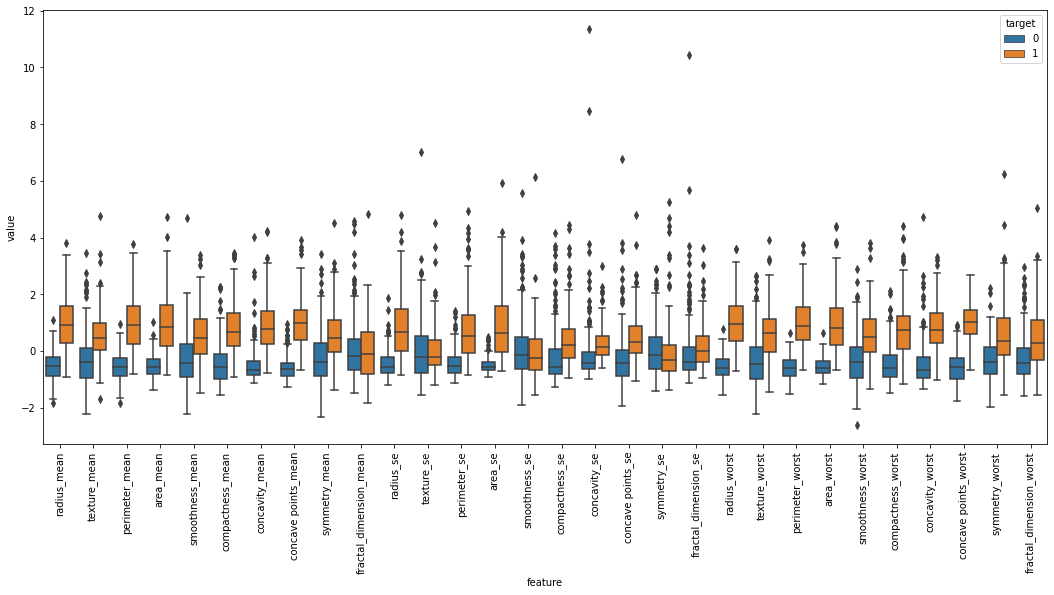

In [32]:
# boxplot
plt.figure(figsize = (18, 8))
sns.boxplot(x = "feature", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

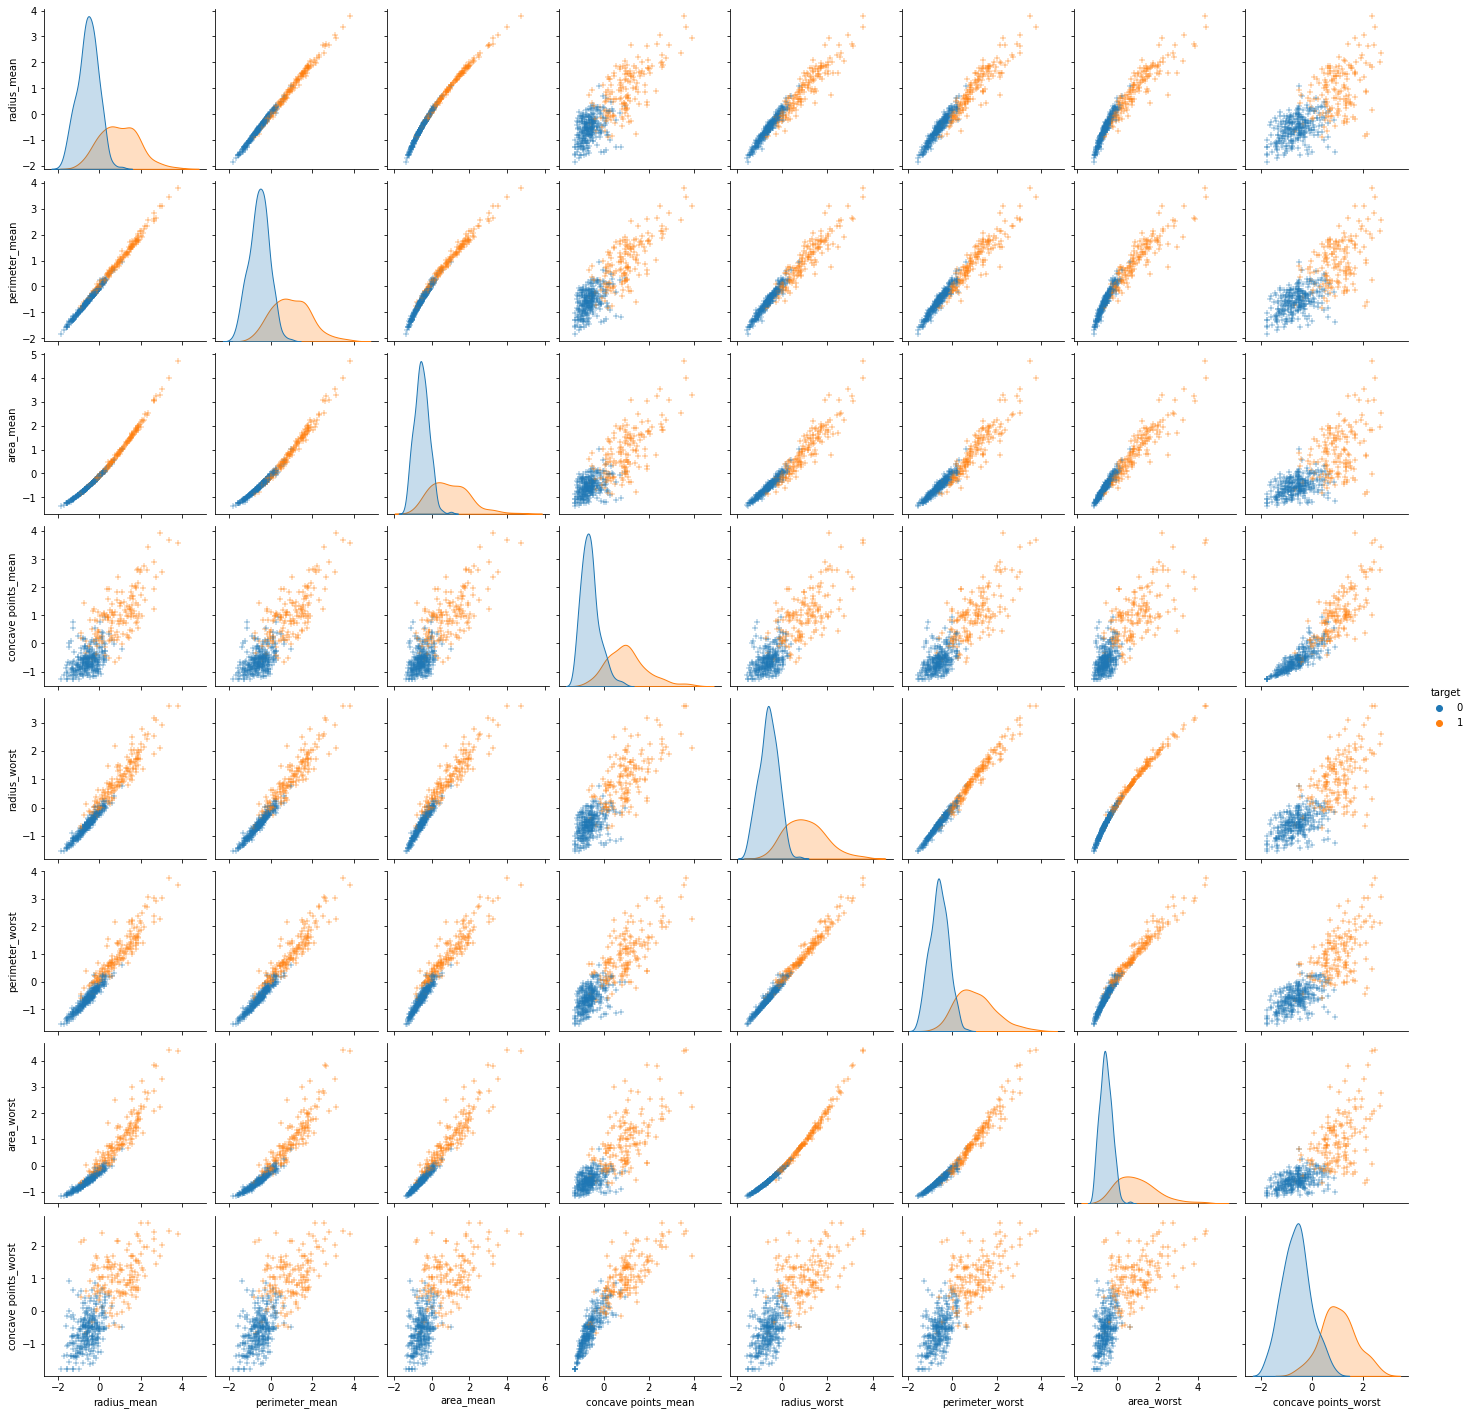

In [33]:
# lets visualize pairplot again with densities under a determined threshold value
threshold = 0.7
filter_ = np.abs(corr_matrix['target']) > threshold
corr_features = corr_matrix.columns[filter_].tolist()
sns.pairplot(train_df[corr_features], diag_kind = 'kde', markers = "+", hue = 'target')
plt.show()

Model

K-Nearest Neighbors (KNN) Algorithm
K-nearest neighbors (KNN) is a type of supervised learning algorithm used for both regression and classification. 
KNN tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then select the K number of points which is closet to the test data. 
The KNN algorithm calculates the probability of the test data belonging to the classes of ‘K’ training data and class holds the highest probability will be selected. 
In the case of regression, the value is the mean of the ‘K’ selected training points.

Let see the below example to make it a better understanding

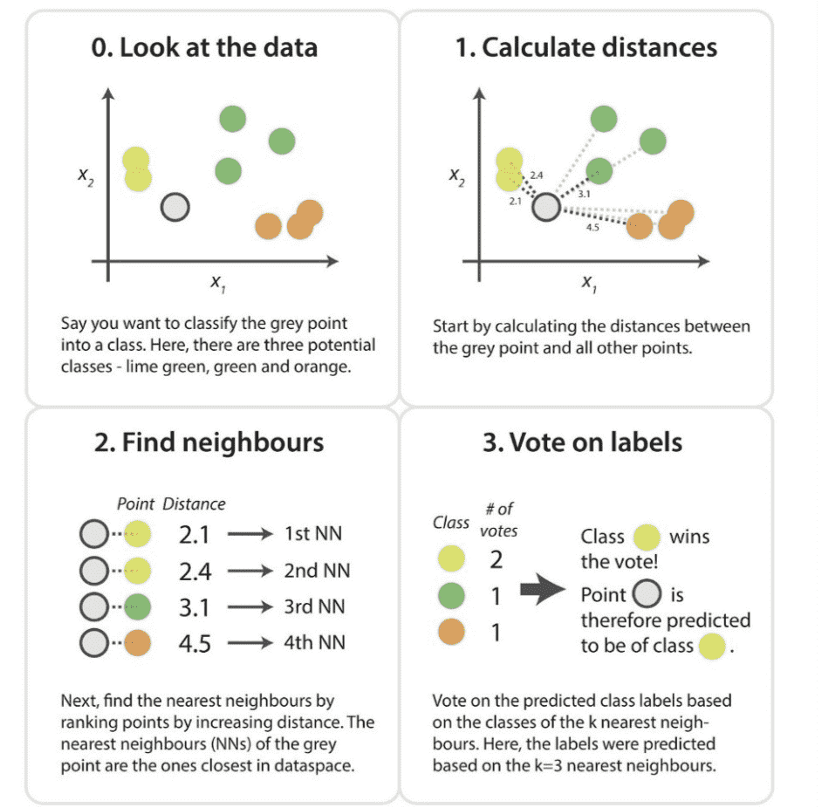

Source: [https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4]

In [34]:
# KNN Model with k = 2
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
score = knn.score(x_test, y_test)
print("Score: ", score)
print("Confusion matrix: ")
print(cm)
print("Basic KNN accuracy: ", acc)

Score:  0.9529411764705882
Confusion matrix: 
[[107   0]
 [  8  55]]
Basic KNN accuracy:  0.9529411764705882


Model score is fairly good but we can do better with hyperparameter optimization.

In [35]:
# Choosing best KNN parameters
def KNN_Best_Params(x_train, x_test, y_train, y_test):
    
    k_range = list(range(1,31))
    weight_options = ["uniform", "distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score {} with parameters: {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test score: {}, train score: {}".format(acc_test, acc_train))
    print()
    print("CM Test")
    print(cm_test)
    print("CM Train")
    print(cm_train)
    
    return grid

grid = KNN_Best_Params(x_train, x_test, y_train, y_test)


Best training score 0.9692948717948718 with parameters: {'n_neighbors': 4, 'weights': 'distance'}

Test score: 0.9470588235294117, train score: 1.0

CM Test
[[104   3]
 [  6  57]]
CM Train
[[249   0]
 [  0 145]]


We can say that this is overfitting because train accuracy is 100% while test accuracy is 94%. Overfitting must be solved later.

Overfitting vs. Underfitting

Overfitting is a concept in data science, which occurs when a statistical model fits exactly against its training data. When this happens, the algorithm unfortunately cannot perform accurately against unseen data, defeating its purpose. Generalization of a model to new data is ultimately what allows us to use machine learning algorithms every day to make predictions and classify data.

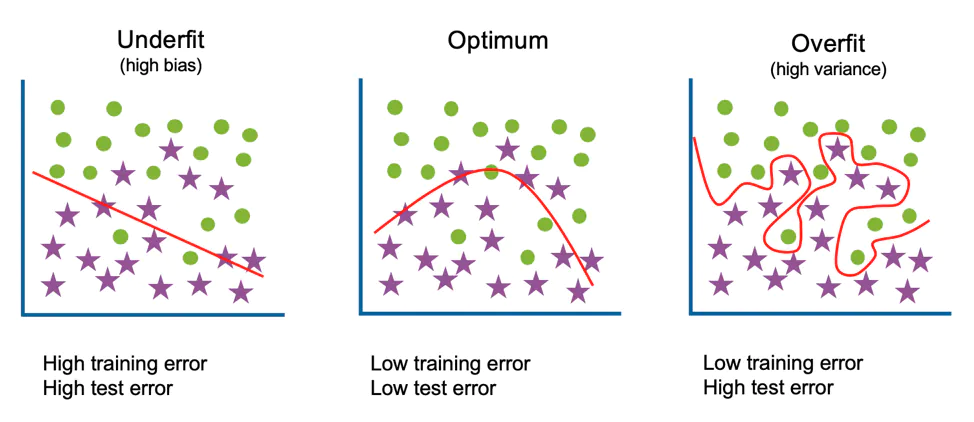

Source: [https://www.ibm.com/cloud/learn/overfitting]

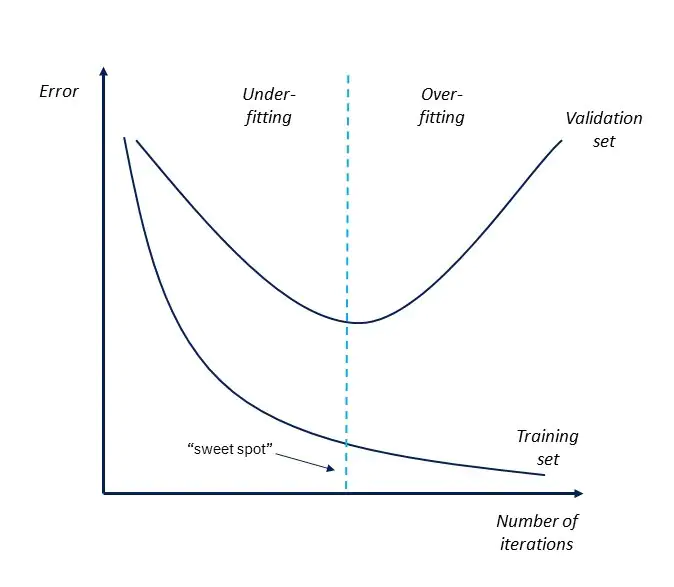

One of the techniques to solve overfitting is to reduce model complexity (dimensionality reduction) so we will do that to increase test accuracy and model success.

Dimensionality Reduction

Principal Component Analysis (PCA)
Principal component analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So, to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

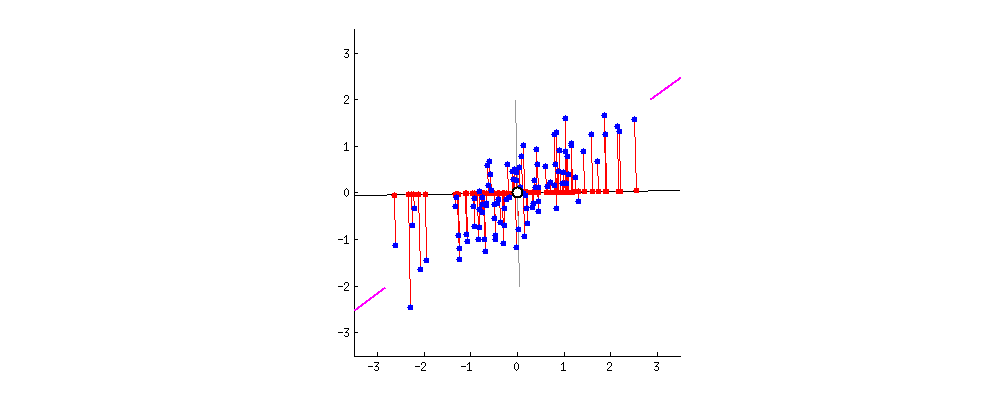

Source: [https://builtin.com/data-science/step-step-explanation-principal-component-analysis]

# Eigen values and eigen vectors

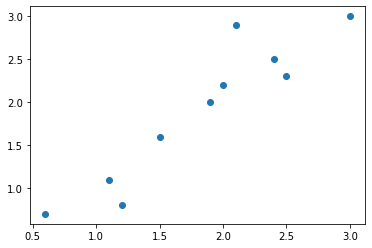

In [36]:
# Assume that we have two arrays to find eigen values and eigen vectors
x2 = np.array([2.4, 0.6, 2.1, 2, 3, 2.5, 1.9, 1.1, 1.5, 1.2])
y2 = np.array([2.5, 0.7, 2.9, 2.2, 3, 2.3, 2, 1.1, 1.6, 0.8])
plt.scatter(x2,y2)

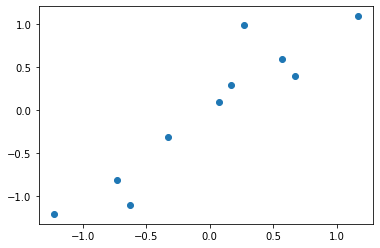

In [37]:
# Transform data to (0,0) center
x_mean = np.mean(x2)
y_mean = np.mean(y2)
x2 = x2 - x_mean
y2 = y2 - y_mean
plt.scatter(x2,y2)

In [38]:
# cov matrix
cov = np.cov(x2, y2)
cov

array([[0.53344444, 0.56411111],
       [0.56411111, 0.68988889]])

In [39]:
from numpy import linalg as LA
w, v = LA.eig(cov)
w

array([0.04215805, 1.18117528])

In [40]:
v

array([[-0.75410555, -0.65675324],
       [ 0.65675324, -0.75410555]])

w(…, M) array The eigenvalues, each repeated according to its multiplicity. The eigenvalues are not necessarily ordered. The resulting array will be of complex type, unless the imaginary part is zero in which case it will be cast to a real type. When a is real the resulting eigenvalues will be real (0 imaginary part) or occur in conjugate pairs

v(…, M, M) array The normalized (unit “length”) eigenvectors, such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].

In [41]:
p1 = v[:, 1]
p2 = v[:, 0]

In [42]:
p1

array([-0.65675324, -0.75410555])

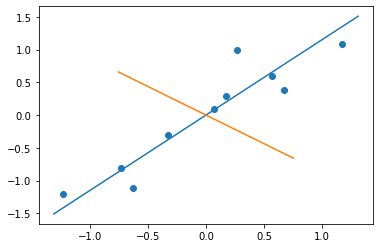

In [43]:
# visualizing eigen vectors and eigen values
plt.scatter(x2,y2)
# main component
plt.plot([-2 * p1[0], 2 * p1[0]] , [-2 * p1[1], 2 * p1[1]])
# small component
plt.plot([-1 * p2[0], 1 * p2[0]] , [-1 * p2[1], 1 * p2[1]])

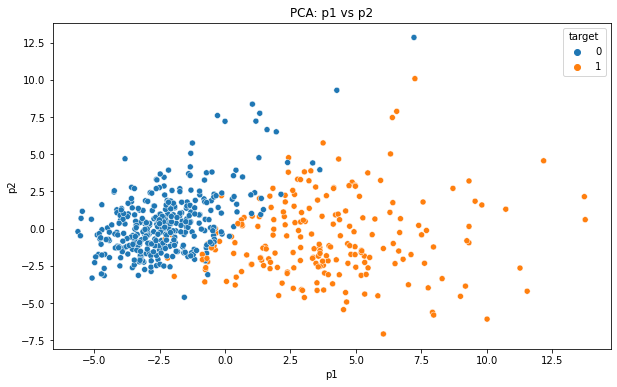

In [44]:
## PCA
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components = 2) # reduction to 2 features
pca.fit(x_scaled)
x_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(x_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = y.reset_index().drop("index", axis = 1)

# visualize PCA
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA: p1 vs p2")
plt.show()

In [45]:
# Train-test split
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced_pca, y, test_size = 0.3, random_state = 42)

In [46]:
grid_pca = KNN_Best_Params(x_train_pca, x_test_pca, y_train_pca, y_test_pca)


Best training score 0.9593589743589742 with parameters: {'n_neighbors': 9, 'weights': 'uniform'}

Test score: 0.9235294117647059, train score: 0.9593908629441624

CM Test
[[102   5]
 [  8  55]]
CM Train
[[243   6]
 [ 10 135]]


Text(0.5, 1.0, "2-Class classification (k = 9, weights = 'uniform')")

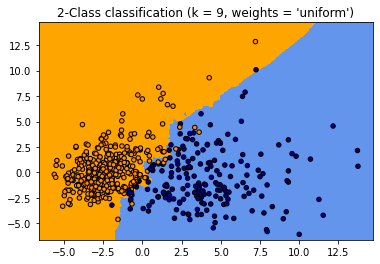

In [47]:
# visualize PCA
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "darkblue"])

h = .05
X = x_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# plot also the trainin points
plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold, edgecolor = "k", s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')" % (len(np.unique(y)), grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))

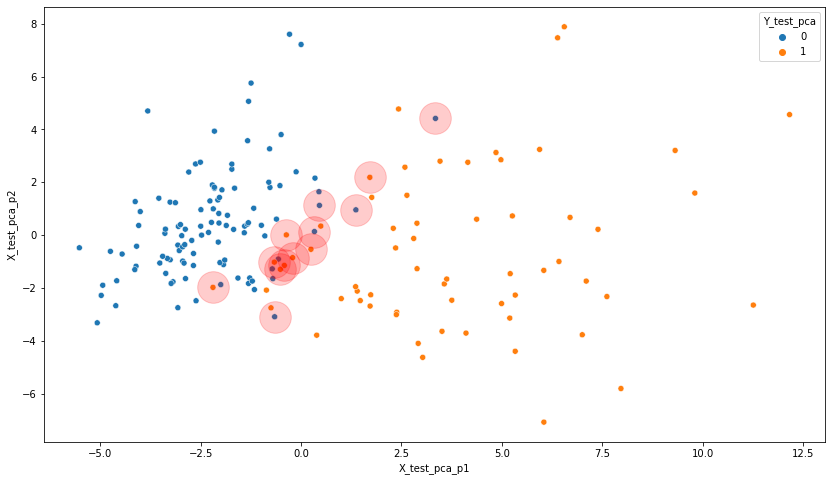

In [48]:
knn = KNeighborsClassifier(**grid_pca.best_params_)
knn.fit(x_train_pca, y_train_pca)
y_pred_pca = knn.predict(x_test_pca)
acc_test_pca = accuracy_score(y_pred_pca, y_test_pca)
knn.score(x_test_pca, y_test_pca)

test_data = pd.DataFrame()
test_data["X_test_pca_p1"] = x_test_pca[:,0]
test_data["X_test_pca_p2"] = x_test_pca[:,1]
test_data["Y_pred_pca"] = y_pred_pca
test_data["Y_test_pca"] = y_test_pca.reset_index().drop("index", axis = 1)

plt.figure(figsize = (14, 8))
sns.scatterplot(x = "X_test_pca_p1", y = "X_test_pca_p2", hue="Y_test_pca", data = test_data)

diff = np.where(y_pred_pca != y_test_pca)[0]
plt.scatter(test_data.iloc[diff, 0], test_data.iloc[diff, 1], label = "Wrong Classified", alpha = 0.2, color = "red",s = 1000)

# Neighborhood Component Analysis (NCA)
Neighbourhood components analysis is a supervised learning method for classifying multivariate data into distinct classes according to a given distance metric over the data. Functionally, it serves the same purposes as the K-nearest neighbors algorithm, and makes direct use of a related concept termed stochastic nearest neighbours.

Rather than having the user specify some arbitrary distance metric, NCA learns it by choosing a parameterized family of quadratic distance metrics, constructing a loss function of the parameters, and optimizing it with gradient descent. Furthermore, the learned distance metric can explicitly be made low-dimensional, solving test-time storage and search issues. How does NCA do this?

The goal of the learning algorithm then, is to optimize the performance of kNN on future test data. Since we don’t a priori know the test data, we can choose instead to optimize the closest thing in our toolbox: the leave-one-out (LOO) performance of the training data

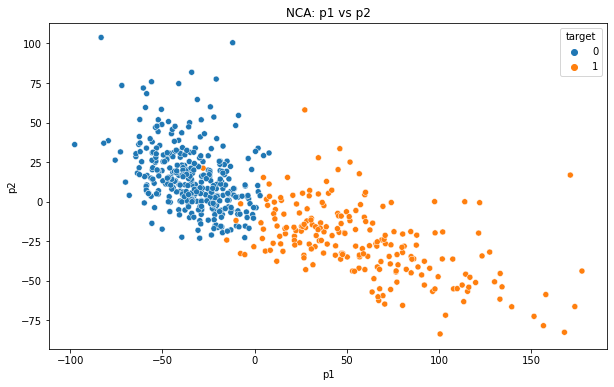

In [49]:
# NCA
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_scaled, y)
x_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(x_reduced_nca, columns = ["p1","p2"])
nca_data["target"] = y.reset_index().drop("index", axis = 1)

plt.figure(figsize = (10, 6))
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = nca_data)
plt.title("NCA: p1 vs p2")
plt.show()

In [50]:
# Train-test split
x_train_nca, x_test_nca, y_train_nca, y_test_nca = train_test_split(x_reduced_nca, y, test_size = 0.3, random_state = 42)

In [51]:
grid_nca = KNN_Best_Params(x_train_nca, x_test_nca, y_train_nca, y_test_nca)


Best training score 0.9949358974358974 with parameters: {'n_neighbors': 7, 'weights': 'distance'}

Test score: 0.9705882352941176, train score: 1.0

CM Test
[[107   0]
 [  5  58]]
CM Train
[[249   0]
 [  0 145]]


Text(0.5, 1.0, "2-Class classification (k = 7, weights = 'distance')")

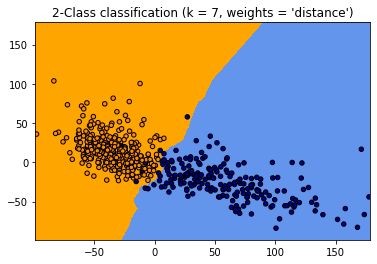

In [52]:
# visualize NCA
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "darkblue"])

h = .2
X = x_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# plot also the trainin points
plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold, edgecolor = "k", s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')" % (len(np.unique(y)), grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))

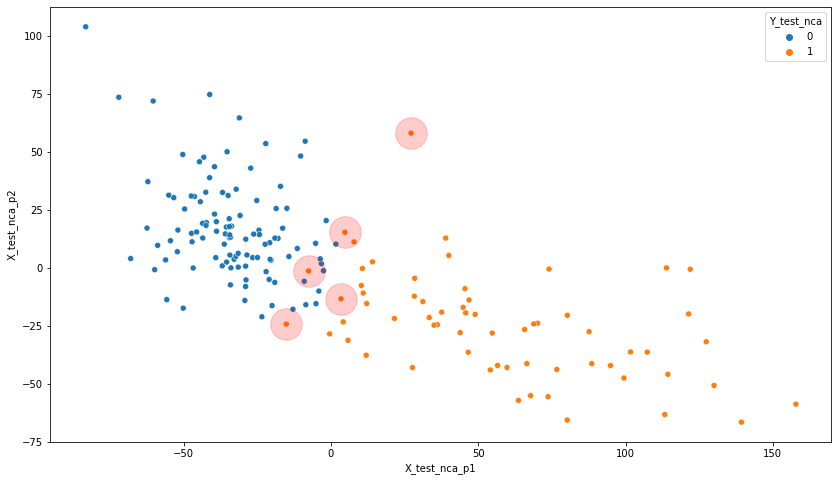

In [53]:
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(x_train_nca, y_train_nca)
y_pred_nca = knn.predict(x_test_nca)
acc_test_nca = accuracy_score(y_pred_nca, y_test_nca)
knn.score(x_test_nca, y_test_nca)

test_data = pd.DataFrame()
test_data["X_test_nca_p1"] = x_test_nca[:,0]
test_data["X_test_nca_p2"] = x_test_nca[:,1]
test_data["Y_pred_nca"] = y_pred_nca
test_data["Y_test_nca"] = y_test_nca.reset_index().drop("index", axis = 1)

plt.figure(figsize = (14, 8))
sns.scatterplot(x = "X_test_nca_p1", y = "X_test_nca_p2", hue="Y_test_nca", data = test_data)

diff = np.where(y_pred_nca != y_test_nca)[0]
plt.scatter(test_data.iloc[diff, 0], test_data.iloc[diff, 1], label = "Wrong Classified", alpha = 0.2, color = "red",s = 1000)